# Assignment 4
## CS146 // Professor Scheffler
## Soren Gran // Nov. 25, 2018

/Users/sorengran/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


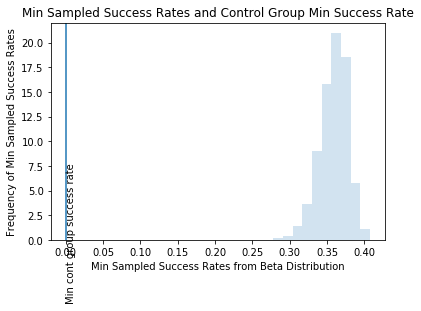

1.0


In [49]:
# 1. Posterior Predictive Tests
# A test statistic is a random variable calculated from the sample data
# Example test statistics: mean, standard deviation, median, min, max

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)

control_data = np.array([[9, 11, 4, 21, 12, 0], [6, 7, 6, 18, 17, 10]])

successes = control_data[0]
failures = control_data[1]

alpha0 = 1
beta0 = 1

# posterior parameters
alpha1 = alpha0 + sum(successes) # posterior beta distribution parameters
beta1 = beta0 + sum(failures)

r = beta.rvs(alpha1, beta1, size=1000)

# Test statistic
control_rates = []

for i in range(len(control_data[0])):
    rate = control_data[0][i]/(control_data[0][i]+control_data[1][i]) 
    # calculating the success rate of each study
    control_rates.append(rate)

minimum = min(control_rates)

# Generating sample test statistics
test_statistics = []
for i in range(1000):
    r = beta.rvs(alpha1, beta1, size=100)
    ts = min(r) # taking the minimum of each sample
    test_statistics.append(ts)

# Histogram
ax.hist(test_statistics, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.axvline(x=minimum)
plt.text(0,7,'Min cont group success rate',rotation=90)
plt.xlabel('Min Sampled Success Rates from Beta Distribution')
plt.ylabel('Frequency of Min Sampled Success Rates')
plt.title('Min Sampled Success Rates and Control Group Min Success Rate')
plt.show()

# p-value
# How many sampled minimums are greater than our control group minimum?
greater_than = 0
for i in test_statistics: # count how often the sampled minimum is greater 
    # than the control group minimum
    if i > minimum:
        greater_than += 1
p_value = greater_than/len(test_statistics)
print(p_value)
# I received a p_value of 1.0, suggesting that the model does not explain the 
# outlier of the control group at all. This is unacceptable, however, because
# this "outlier" makes up over 10% of the control group data, so a model based
# on this data should explain this data point. Therefore, the model we created
# does not explain our control group data well.